## Day Objective
- Preprocessing
    - Feature Scaling
- Supervised Learning
    - Regression Models

### Outliers
- Outliers are different from other data points in dataset. 
- If dataset contains outliers, then it effect on occuring wrong predictions in machime learning and loss of accuracy.

### Feature Scaling Techniques
- Feature(Columns) scaling is used to compress the values between a fixed range (0 to 1 or -ve to +ve or ...)
    1. Standard Scaler
    2. Min Max Scaler
    3. Robust Scaler
    4. etc,...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

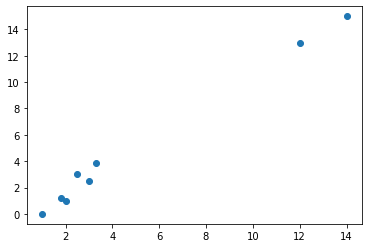

In [2]:
x = [1,2,1.8,3,2.5,3.3,12,14]
y = [0,1,1.2,2.5,3,3.9,13,15]
plt.scatter(x, y)

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/nagamounika5/Datasets/master/Advertisement.csv')
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [4]:
# Check null values
df.shape

(200, 5)

In [5]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [7]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [11]:
#df.drop(['Unnamed: 0'],axis=1,inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [8]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
df.shape

(200, 4)

<AxesSubplot:>

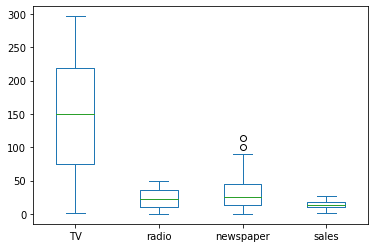

In [10]:
df.plot(kind = 'box')

**1. Standard Scaler**
- If dataset is normally distributed and with outliers, then standard scaler is the best scaling technique.
    - Formula: z = ( Xi - mean(X) ) / std(X)

<AxesSubplot:ylabel='Frequency'>

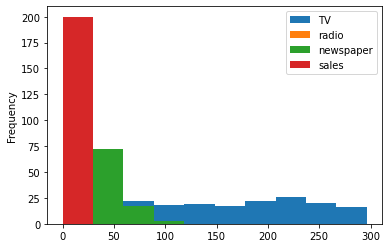

In [12]:
df.plot(kind = 'hist')

In [13]:
print(df['TV'].mean())
print(df['TV'].std())

147.0425
85.8542363149081


In [14]:
(230.1 - 147.0425) / 85.8542363149081

0.9674245973763037

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
st = StandardScaler()

In [18]:
st2 = st.fit_transform(df)
st2

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00,
         1.55205313e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01,
        -6.96046111e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00,
        -9.07405869e-01],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00,
         8.60330287e-01],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00,
        -2.15683025e-01],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00,
        -1.31091086e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01,
        -4.27042783e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01,
        -1.58039455e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00,
        -1.77205942e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01,
        -6.57617064e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01,
        -1.04190753e+00],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00,
      

In [19]:
st2 = pd.DataFrame(st2, columns = df.columns)
st2

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,-1.234053
196,-0.617035,-1.240003,-1.033598,-0.830548
197,0.349810,-0.942899,-1.111852,-0.234898
198,1.594565,1.265121,1.640850,2.205347


In [20]:
import seaborn as sns

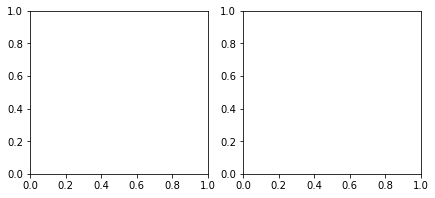

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (7,3))

Text(0.5, 0, 'X-Axis')

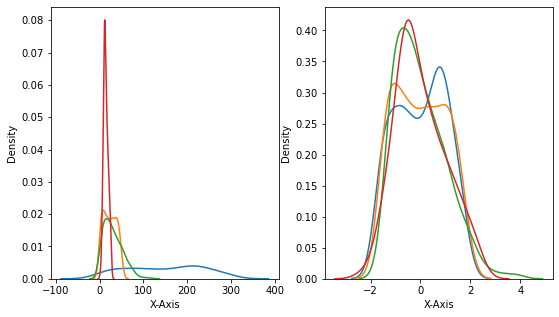

In [32]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (9,5))

sns.kdeplot(df['TV'], ax = ax1)
sns.kdeplot(df['radio'], ax = ax1)
sns.kdeplot(df['newspaper'], ax = ax1)
sns.kdeplot(df['sales'], ax = ax1)

ax1.set_xlabel('X-Axis')

sns.kdeplot(st2['TV'], ax = ax2)
sns.kdeplot(st2['radio'], ax = ax2)
sns.kdeplot(st2['newspaper'], ax = ax2)
sns.kdeplot(st2['sales'], ax = ax2)

ax2.set_xlabel('X-Axis')

In [29]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots.
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (*sharex*) or y (*sharey*)
        axes:
    
        - True or 'all': x- or y-axis will be shared among all subplots.
        - False or 'none': each subplot x- or y-axis will be independent.
        - 'row': each subplot row will share an x- or y-axis.
        - 'col': each subplot column will share an x- or y-axis.
    
        When subplots have a shared x-axis along a column, on

**2. MinMaxScaler**
- It scales the data points between 0 to 1
    - Formula:  ( Xi - min(X) ) / ( max(X) - min(X) )

In [33]:
from sklearn.preprocessing import MinMaxScaler

**Task**
- Apply MinMax scaler to advertisement dataset.
- Check the difference visually for original dataset and scalled dataset.